In [1]:
from tqdm import tqdm
import json
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#https://github.com/dhaitz/mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")
plt.rcParams['figure.facecolor'] = '#0d1117'
plt.rcParams['axes.facecolor'] = '#0d1117'
plt.rcParams['savefig.facecolor'] = '#0d1117'

In [2]:
lines = ''
root_dir = '\\\\databrick\\Active Server Drive\\log_dir\\eve_miner'
#root_dir = "O:\\log_dir\\eve_miner"
with open(f"{root_dir}\\miner_2023-03-21_05-20-58_112232.log") as f:
    lines = f.readlines()

In [3]:
mining_class_lines = []
for line in tqdm(lines):
    if 'MiningBot.BotActions.Actions:mine_till_full_v2:' in line and ' - {' in line:
        index = line.find('{')
        mining_class_lines.append(json.loads(line[index:-1].replace("'", '"').replace('UUID("', '"').replace('")', '"').replace("True", '1').replace("False", '0')))

100%|█████████████████████████████████████████████████████████████████████| 267352/267352 [00:00<00:00, 2970564.87it/s]


In [4]:
len(mining_class_lines)

3856

In [5]:
mining_class_lines[0]

{'argmax_index': 4,
 'value_at_argmax': 0.9999999,
 'pass_general_tollerance': 1,
 'class': 'no_miners_running',
 'classes': ['both_running',
  'invalid',
  'miner_1_running',
  'miner_2_running',
  'no_miners_running'],
 'scores': [4.885463700254888e-10,
  8.027865594506522e-10,
  1.295126139666536e-07,
  3.752152366587325e-09,
  0.9999998807907104],
 'id': '29276c5a-c7d6-11ed-a2f9-9c5c8ec2126c',
 'model': 'mining_tool_state'}

In [6]:
df = pd.DataFrame(mining_class_lines)
df

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,4,1.000000,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[4.885463700254888e-10, 8.027865594506522e-10,...",29276c5a-c7d6-11ed-a2f9-9c5c8ec2126c,mining_tool_state
1,4,0.998839,1,no_miners_running,"[both_running, invalid, miner_1_running, miner...","[1.0530473446124233e-05, 1.9729448467842303e-0...",c6350fd4-c7d8-11ed-9f7b-9c5c8ec2126c,mining_tool_state
2,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 1.7677219822480328e-13, 1.63124802554648...",e22dfd6d-c7d8-11ed-8487-9c5c8ec2126c,mining_tool_state
3,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9999998807907104, 4.9994581499852864e-14, 6...",f7649b36-c7d8-11ed-8025-9c5c8ec2126c,mining_tool_state
4,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 4.1081074224911043e-14, 3.04203617851328...",0c9212b2-c7d9-11ed-9a2a-9c5c8ec2126c,mining_tool_state
...,...,...,...,...,...,...,...,...
3851,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 2.5828179544509544e-19, 1.10996411714636...",ffd5cbff-c9d6-11ed-bdf8-9c5c8ec2126c,mining_tool_state
3852,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 1.57659632135872e-16, 3.0288589414340095...",151a1b65-c9d7-11ed-869c-9c5c8ec2126c,mining_tool_state
3853,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 3.447136898216324e-17, 1.007221639426347...",2a64d8ea-c9d7-11ed-8898-9c5c8ec2126c,mining_tool_state
3854,0,1.000000,1,both_running,"[both_running, invalid, miner_1_running, miner...","[1.0, 4.998511820953812e-19, 1.507777193029968...",3fad8c0b-c9d7-11ed-b510-9c5c8ec2126c,mining_tool_state


In [7]:
df = df.sort_values(by='value_at_argmax', ascending=True).reset_index()
del df['index']
df[0:20]

,argmax_index,value_at_argmax,pass_general_tollerance,class,classes,scores,id,model
0,3,0.617300,1,miner_2_running,"[both_running, invalid, miner_1_running, miner...","[0.38269996643066406, 8.491178002693542e-14, 3...",2d9b82a8-c85f-11ed-856b-9c5c8ec2126c,mining_tool_state
1,0,0.977489,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.977489173412323, 1.9671285433897623e-11, 0....",d81a4626-c8da-11ed-a679-9c5c8ec2126c,mining_tool_state
2,0,0.982730,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9827297925949097, 4.107771761630019e-11, 0....",4c684a6a-c908-11ed-b55c-9c5c8ec2126c,mining_tool_state
3,0,0.990438,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9904380440711975, 1.3603455167876533e-11, 0...",e45ef520-c8cf-11ed-bf4b-9c5c8ec2126c,mining_tool_state
4,0,0.995167,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9951673746109009, 9.526190600239737e-13, 0....",95b2a54e-c7e2-11ed-9418-9c5c8ec2126c,mining_tool_state
5,0,0.995216,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9952164888381958, 5.458488262083394e-12, 0....",a4e4c16a-c8d0-11ed-9b46-9c5c8ec2126c,mining_tool_state
6,0,0.996647,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9966474175453186, 5.851043538562806e-10, 0....",d0833f99-c8ea-11ed-a4b9-9c5c8ec2126c,mining_tool_state
7,0,0.997414,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9974138140678406, 6.895259103273377e-12, 0....",06049733-c8ec-11ed-8568-9c5c8ec2126c,mining_tool_state
8,0,0.997724,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9977237582206726, 2.727157258700097e-12, 0....",11ee7bb9-c839-11ed-b8b5-9c5c8ec2126c,mining_tool_state
9,0,0.998251,1,both_running,"[both_running, invalid, miner_1_running, miner...","[0.9982512593269348, 2.034971583603218e-12, 0....",09d39682-c9d2-11ed-bbff-9c5c8ec2126c,mining_tool_state


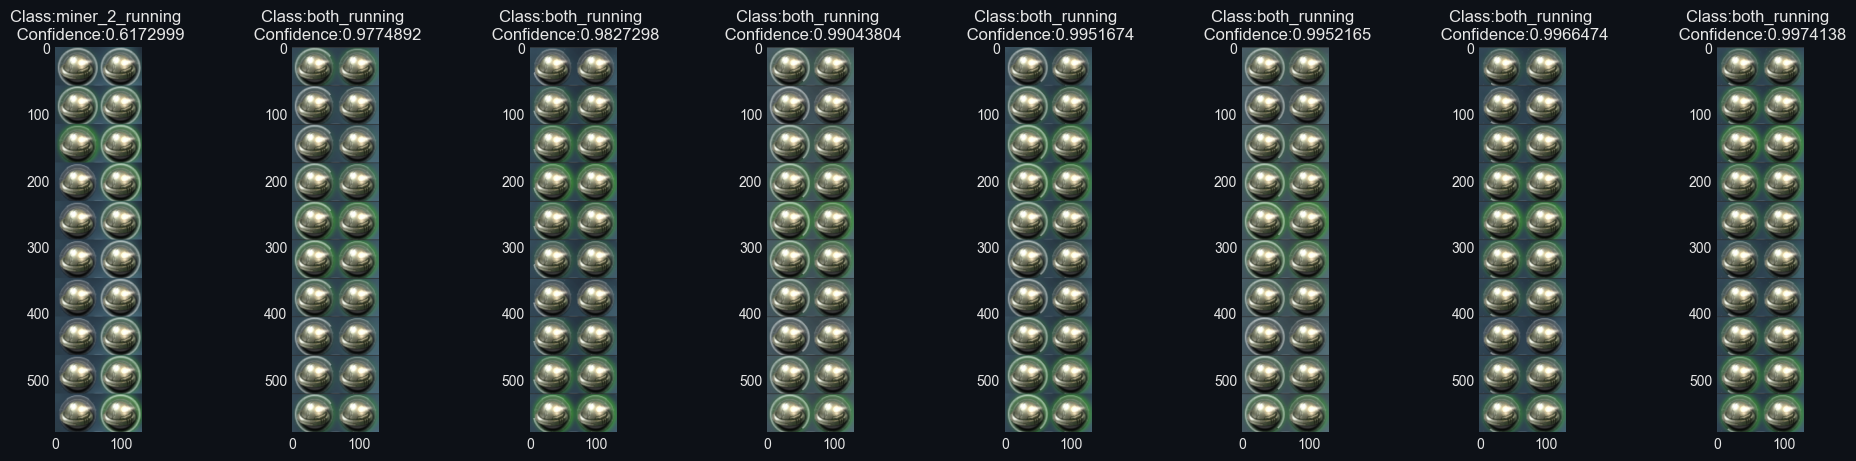

In [8]:
n_cols = 8
n_rows = 1
cell_with_dim = 3
cell_height_dim = 5

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))
for i, x in enumerate(df[0:n_cols].index):
    im = Image.open(f"{root_dir}\\images\\{df.loc[i, 'id']}.png")
    ax[x].grid(False)
    ax[x].set_title(f"Class:{df.loc[i, 'class']} \n Confidence:{df.loc[i, 'value_at_argmax']}")
    ax[x].imshow(im)

<Axes: xlabel='value_at_argmax', ylabel='Percent'>

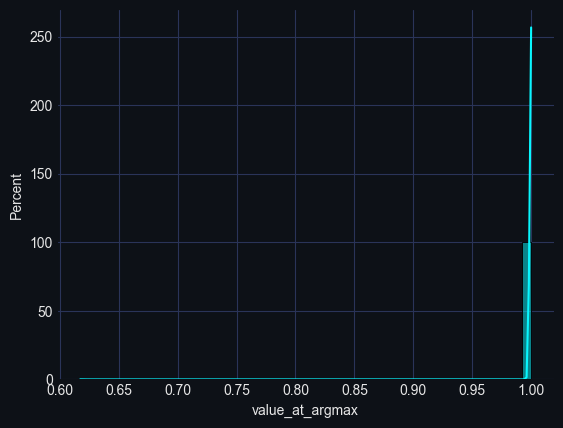

In [9]:
sns.histplot(data=df, x="value_at_argmax", kde=True, bins=50, stat="percent")

In [13]:
low_performing_list = df[df['value_at_argmax'] < 0.99]['id'].tolist()
low_performing_list

['150c6642-c67d-11ed-9a9a-2cf05d9fe8eb',
 'c475084b-c67b-11ed-9010-2cf05d9fe8eb',
 '6cbc3a8c-c67c-11ed-949c-2cf05d9fe8eb',
 '314fe95a-c67b-11ed-a4bb-2cf05d9fe8eb',
 '2da3ea2f-c67c-11ed-8106-2cf05d9fe8eb',
 'd97a7728-c67b-11ed-a678-2cf05d9fe8eb',
 '000361b7-c67d-11ed-9ed0-2cf05d9fe8eb',
 '9a6f01cd-c67b-11ed-bcbe-2cf05d9fe8eb',
 'c0e36231-c67c-11ed-8e94-2cf05d9fe8eb',
 'd5ed20dd-c67c-11ed-8eaa-2cf05d9fe8eb',
 '189c6ad3-c67c-11ed-96bb-2cf05d9fe8eb',
 '96c91b25-c67c-11ed-8b94-2cf05d9fe8eb',
 '0392ccc4-c67c-11ed-ac4b-2cf05d9fe8eb',
 'f23163d6-c67a-11ed-9024-2cf05d9fe8eb',
 '8565ce3f-c67b-11ed-8e51-2cf05d9fe8eb',
 'abd87c71-c67c-11ed-aff2-2cf05d9fe8eb',
 '0740c72c-c67b-11ed-9871-2cf05d9fe8eb',
 '70670b56-c67b-11ed-a8da-2cf05d9fe8eb',
 'eb01148f-c67c-11ed-ac15-2cf05d9fe8eb',
 '42ad733c-c67c-11ed-a66f-2cf05d9fe8eb',
 '465618cb-c67b-11ed-855e-2cf05d9fe8eb',
 'dd252d47-c67a-11ed-b599-2cf05d9fe8eb',
 '57b4c607-c67c-11ed-a5e7-2cf05d9fe8eb',
 'af707b42-c67b-11ed-b5bd-2cf05d9fe8eb']

In [14]:
import shutil
for item in low_performing_list:
    shutil.copy(f"{root_dir}\\images\\{item}.png", f"O:\\source\\repos\\EVE-Online-Bot\\training_data\\unclass\\{item}.png")